# Deep Neural Network<br>
Deep neural network 구현

## MNIST dataset 불러 오기 및 시각화

In [1]:
from __future__ import print_function

import torch
from torch import nn
from torch import optim
import numpy as np

import time

# dataset
import torchvision 
from torchvision import datasets
from torchvision import transforms

import pandas as pd
import matplotlib.pyplot as plt


## Hyperparameter
modeling 과정에서 직접 설정하는 값입니다.<br>
- batch_size
- learning rate : 학습률(gradient를 통해 weight를 이동, 변화시키는 정도)
- epoch_nums : 학습을 반복하는 횟수
- batch size : 한번의 batch마다 주어지는 data sample의 size (batch: 나누어진 dataset)
- momentum : weight의 update과정에서 관성, 가속도를 주어 감소, 증가하는 방향으로 더 많은 변화를 준다.

In [2]:
batch_size = 10
# batch_size = 32
# learning_rate = 0.01
learning_rate = 0.005
# learning_rate = 0.1
epoch_num = 15
# epoch_num = 20

## MNIST dataset
### torchvision.datasets.MNIST = (root="", train="", dawnload="",trasform ="")
root = "data의 경로" <br>
train = True(학습용 데이터) or False(test용 데이터) <br>
tramsform - 데이터 형태 <br>
download = True(MNIST dataset이 없으면 다운로드한다.) <br>

In [3]:
train_data = datasets.MNIST(root= '..\datasets', train= True, download= True, transform= transforms.ToTensor())
test_data = datasets.MNIST(root= '..\datasets', train= False, download= True, transform= transforms.ToTensor())

train_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_data, batch_size=batch_size)

# Deep Neural Network
input layer와 ouput layer사이에 hidden layer를 2개이상 지닌 neural network을 의미합니다.
- 분류와 수치예측을 주목적으로 하여 이미지 학습과 문자인식에 유용하게 사용되고 있는 신경망입니다.

## Using squential 
squential하여 내부  module에 접급하지 않는다.

## Using ModuleList
Module을 리스트 형태로 담을 때 사용합니다. ModuleList에서는 module하나하나에 접근이 가능하다.

In [4]:
# Using ModuleList
class DeepNN_ML(nn.Module):
    def __init__(self):
        super(DeepNN_ML, self).__init__()

        self.in_dim = 28 * 28 # MNIST
        self.out_dim = 10 # 0 ~ 9

        self.list = nn.ModuleList([
            nn.Linear(in_features = self.in_dim, out_features = 512),
            nn.ReLU(),
            nn.Linear(in_features = 512, out_features = 256),
            nn.ReLU(),
            nn.Linear(in_features = 256, out_features = 128),
            nn.ReLU(),
            nn.Linear(in_features = 128, out_features = 64),
            nn.ReLU(),

            nn.Linear(in_features = 64, out_features = self.out_dim)
        ])

    def forward(self, x):
        fw = x.view(-1, self.in_dim)
        for i, module in enumerate(self.list):
            fw = module(fw)

        return fw



In [5]:
# Using ModuleList
class DeepNN_ML(nn.Module):
    def __init__(self, hidden_units=[512, 256, 128, 64]):
        super(DeepNN_ML, self).__init__()

        self.in_dim = 28 * 28 # MNIST
        self.out_dim = 10 # 0 ~ 9

        self.len = len(hidden_units) - 2
        
        self.relu = nn.ReLU()
        self.fl = nn.Linear(in_features = hidden_units[-1], out_features = self.out_dim)

        hidden_units.insert(0, self.in_dim)
        
        self.list = nn.ModuleList([
            nn.Linear(in_features = in_f, out_features = out_f) for in_f, out_f in zip(hidden_units, hidden_units[1:])
        ])  


    def forward(self, x):
        fw = x.view(-1, self.in_dim)
        for i, module in enumerate(self.list):
            fw = self.relu(module(fw))
            
        fw = self.fl(fw)
        return fw



In [6]:
# model_ML = DeepNN_ML()
# criterion = nn.CrossEntropyLoss()
# optimizer = optim.SGD(model_ML.parameters(), lr = learning_rate)
# for epoch in range(epoch_num):
#     running_loss = 0.0
#     for i, data in enumerate(train_loader,0):
#         # get the inputs: data is a list of [input, label]
#         inputs, labels = data

#         # zero the parameter gradients
#         optimizer.zero_grad()

#         # forward, backward, optimizer
#         outputs = model_ML(inputs)
#         loss = criterion(outputs, labels) # loss
#         loss.backward() # backward
#         optimizer.step()

#         # print statistics
#         running_loss += loss.item()
#         if (i+1) % 2000 == 0 : # print every 2000 mini-batch
#             print("[%d, %5d] loss: %.3f" % (epoch+1, i+1, running_loss/2000) )
#             running_loss = 0.0
# print("Finished training")


In [7]:
# HiddenUnitsList = [[256],[256,64],[256,128,64],[512,256,128,64],[512,256,128,64,32]]
HiddenUnitsList = [[256],[256,64],[256,128,64],[512,256,128,64],[512,256,128,64,32]]
ModelList = []
for hidden_units in HiddenUnitsList:
    model = DeepNN_ML(hidden_units)
    ModelList.append(model)

    criterion = nn.CrossEntropyLoss()
    optimizer = optim.SGD(ModelList[-1].parameters(), lr = learning_rate)

    for epoch in range(epoch_num):
        running_loss = 0.0
        for i, data in enumerate(train_loader,0):
            # get the inputs: data is a list of [input, label]
            inputs, labels = data

            # zero the parameter gradients
            optimizer.zero_grad()

            # forward, backward, optimizer
            outputs = ModelList[-1](inputs)
            loss = criterion(outputs, labels) # loss
            loss.backward() # backward
            optimizer.step()

            # print statistics
            running_loss += loss.item()
            if (i+1) % 2000 == 0 : # print every 2000 mini-batch
                print("[%d, %5d] loss: %.3f" % (epoch+1, i+1, running_loss/2000) )
                running_loss = 0.0

    print("Finished training Networt # of layers:", hidden_units)

[1,  2000] loss: 1.186
[1,  4000] loss: 0.480
[1,  6000] loss: 0.379
[2,  2000] loss: 0.341
[2,  4000] loss: 0.328
[2,  6000] loss: 0.305
[3,  2000] loss: 0.295
[3,  4000] loss: 0.272
[3,  6000] loss: 0.264
[4,  2000] loss: 0.253
[4,  4000] loss: 0.244
[4,  6000] loss: 0.236
[5,  2000] loss: 0.228
[5,  4000] loss: 0.223
[5,  6000] loss: 0.204
[6,  2000] loss: 0.204
[6,  4000] loss: 0.190
[6,  6000] loss: 0.196
[7,  2000] loss: 0.178
[7,  4000] loss: 0.178
[7,  6000] loss: 0.180
[8,  2000] loss: 0.162
[8,  4000] loss: 0.164
[8,  6000] loss: 0.164
[9,  2000] loss: 0.153
[9,  4000] loss: 0.145
[9,  6000] loss: 0.152
[10,  2000] loss: 0.144
[10,  4000] loss: 0.139
[10,  6000] loss: 0.133
[11,  2000] loss: 0.134
[11,  4000] loss: 0.125
[11,  6000] loss: 0.126
[12,  2000] loss: 0.122
[12,  4000] loss: 0.120
[12,  6000] loss: 0.118
[13,  2000] loss: 0.113
[13,  4000] loss: 0.110
[13,  6000] loss: 0.114
[14,  2000] loss: 0.108
[14,  4000] loss: 0.107
[14,  6000] loss: 0.101
[15,  2000] loss: 0

TEST

In [8]:
# def imshow(img):
#     npimg = img.numpy()
#     plt.imshow(np.transpose(npimg, (1, 2, 0)))
#     plt.show()


In [9]:
# dataiter = iter(test_loader)
# images, labels = dataiter.next()

# imshow(torchvision.utils.make_grid(images, nrow = batch_size))
# print('GroundTruth')
# print("  "+'  '.join('%3s' % label.item() for label in labels))
# model_ML.epochs = 10
# outputs = model_ML(images) 
# _, predicted = torch.max(outputs, 1) 
# print("Prediction")
# print("  "+'  '.join('%3s' % label.item() for label in predicted))


In [10]:
# n_predict = 0
# n_correct = 0
# model_ML.epochs = 10
# for data in test_loader:
#     inputs, labels = data
#     outputs = model_ML(inputs)
#     _, predicted = torch.max(outputs, 1)

#     n_predict += len(predicted)
#     n_correct += (labels == predicted).sum()

# print(f"{n_correct}/{n_predict}")
# print(f"Accuracy:{n_correct/n_predict:.3f}")



In [11]:
Accuracy = []
for i,model in enumerate(ModelList):
    n_predict = 0
    n_correct = 0
    model.epochs = 10
    for data in test_loader:
        inputs, labels = data
        outputs = model(inputs)
        _, predicted = torch.max(outputs, 1)

        n_predict += len(predicted)
        n_correct += (labels == predicted).sum()

    print(f"{n_correct}/{n_predict}")
    print(f"Accuracy:{n_correct/n_predict:.3f}")
    Accuracy.append(n_correct/n_predict)

9676/10000
Accuracy:0.968
9749/10000
Accuracy:0.975
9763/10000
Accuracy:0.976
9667/10000
Accuracy:0.967
9768/10000
Accuracy:0.977


In [12]:
# AND, OR, XOP paremeter들의 학습과정에서 얻는 cost들을 graph로 표현한다.
def graph(data):
    plt.figure(figsize=(18,6))
    plt.plot(range(2,7),data)
    



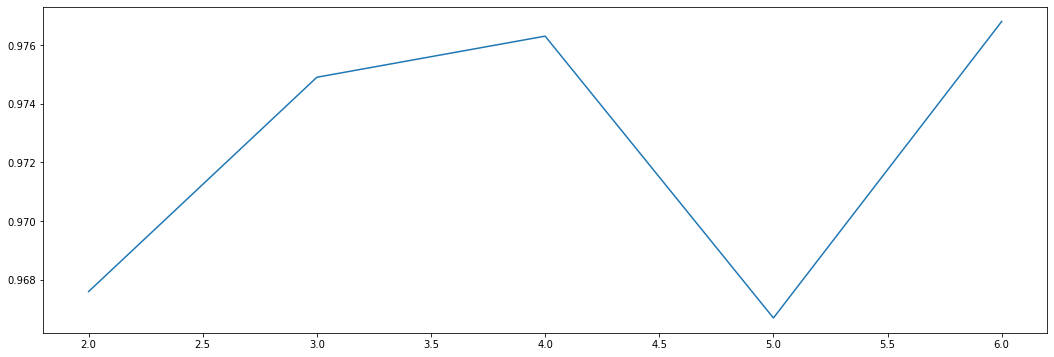

In [13]:
graph(Accuracy)